In [2]:
%matplotlib inline

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.model_selection import train_test_split

In [25]:
attributes, clusters = make_blobs(n_samples=5000)

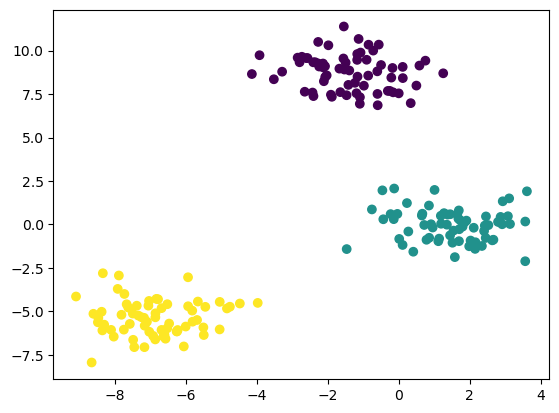

In [22]:
plt.scatter(attributes[:,0], attributes[:,1], c = clusters)
plt.show()

In [29]:
attributes_train, attributes_test, clusters_train, clusters_test = train_test_split(attributes, clusters, test_size=0.1, stratify= clusters)

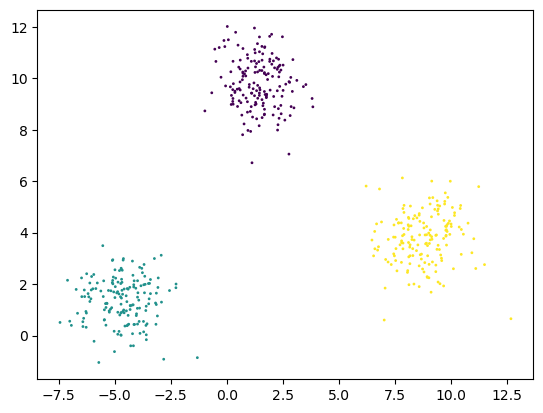

In [30]:
plt.scatter(attributes_test[:,0], attributes_test[:,1], c = clusters_test,s = 1)
plt.show()

In [75]:
k_means = KMeans(n_clusters=3, init= "random")
k_means_centr = KMeans(n_clusters=3, init=[[10,-6],[10,-3],[0,-8]])
k_means_k = KMeans(n_clusters=3, init='k-means++')

In [33]:
k_means.fit(attributes_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [38]:
train_prediction =  k_means.predict(attributes_train)
test_prediction =  k_means.predict(attributes_test)

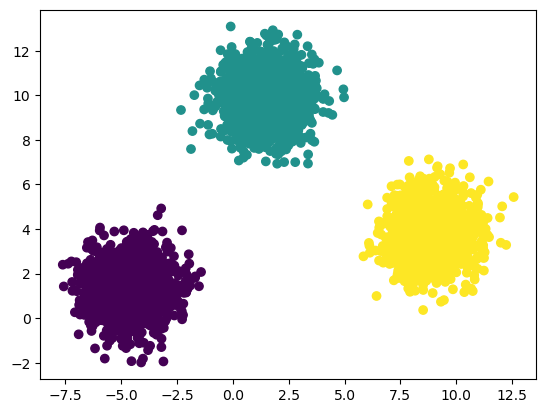

In [37]:
plt.scatter(attributes_train[:,0], attributes_train[:, 1], c = train_prediction)

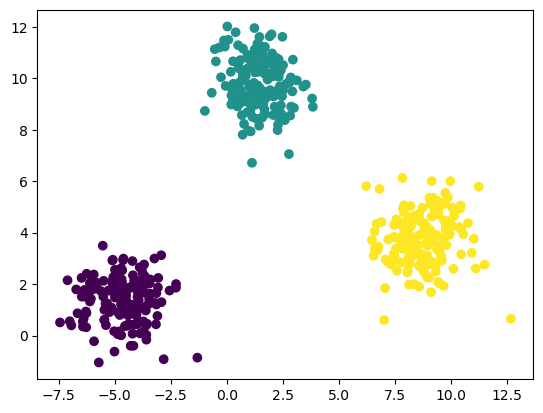

In [39]:
plt.scatter(attributes_test[:,0], attributes_test[:, 1], c = test_prediction)

In [45]:
attributes_n, clusters_n = make_blobs(n_samples=5000)#, cluster_std=3)

In [76]:
k_means_k.fit(attributes_n)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

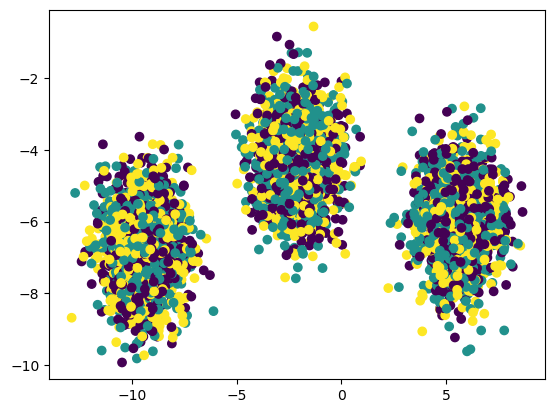

In [46]:
plt.scatter(attributes_n[:,0], attributes_n[:,1], c= clusters)

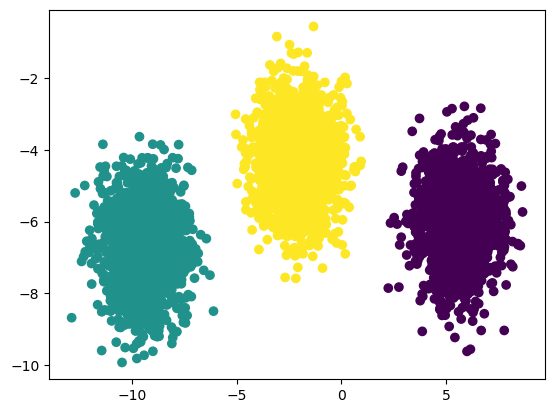

In [77]:
plt.scatter(attributes_n[:,0], attributes_n[:,1], c= k_means_k.predict(attributes_n))

In [47]:
k_means.fit(attributes_n)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

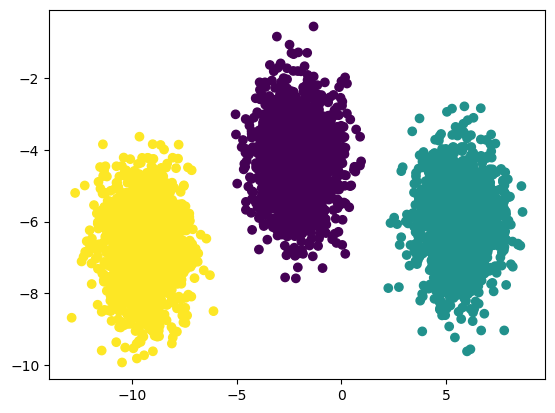

In [48]:
plt.scatter(attributes_n[:,0], attributes_n[:,1], c= k_means.predict(attributes_n))

In [62]:
attributes_skew = attributes_n @ np.array([[1,0.5], [0.9,1]])

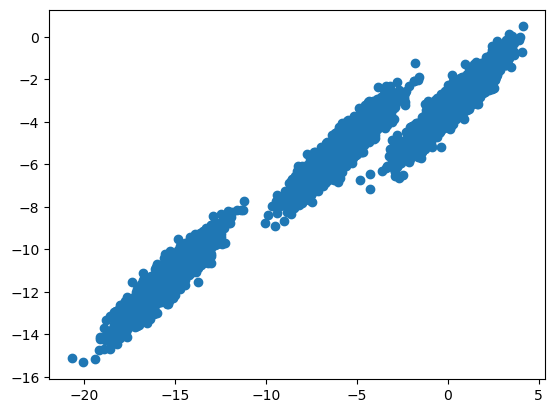

In [63]:
plt.scatter(attributes_skew[:,0], attributes_skew[:,1])

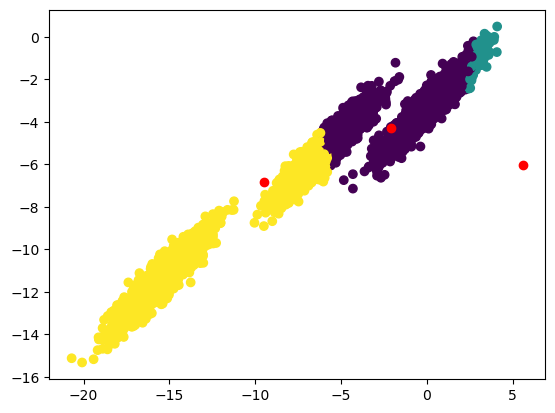

In [66]:
plt.scatter(attributes_skew[:,0], attributes_skew[:,1], c = k_means.predict(attributes_skew))
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], c="r")

In [71]:
k_means_centr.fit(attributes_n)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init=[[10, -6], [10, -3], [0, -8]], n_clusters=3)

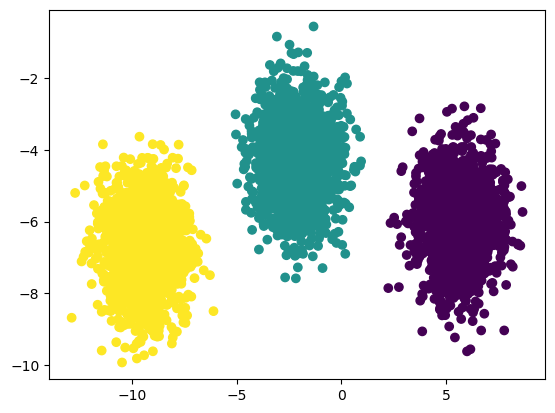

In [72]:
plt.scatter(attributes_n[:,0], attributes_n[:,1], c = k_means_centr.predict(attributes_n))

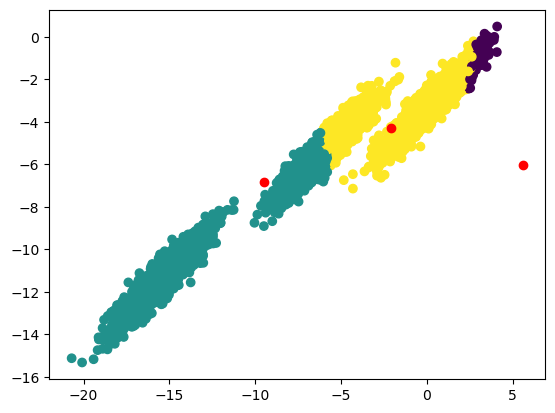

In [79]:
plt.scatter(attributes_skew[:,0], attributes_skew[:,1], c = k_means_k.predict(attributes_skew))
plt.scatter(k_means_k.cluster_centers_[:,0], k_means_k.cluster_centers_[:,1], c = 'r')

In [81]:
k_means_k.inertia_

10172.28936613204

In [83]:
#ако не знаем кластърите
data = {
    "n_clusters": [],
    "inertials": []
}
for n_cluster in range(1, 11):
    k_means = KMeans(n_clusters=n_cluster)
    k_means.fit(attributes_n)
    data["n_clusters"].append(n_cluster)
    data["inertials"].append(k_means.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [84]:
clusters_data = pd.DataFrame(data)

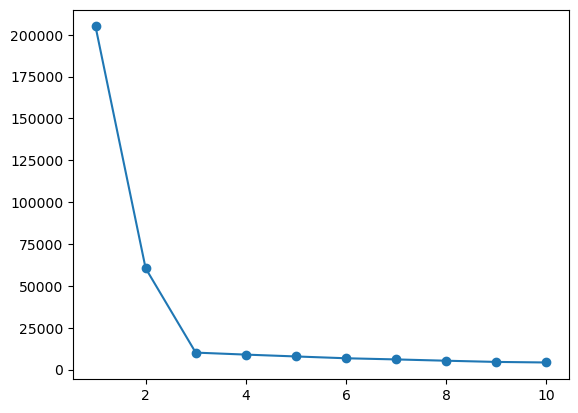

In [86]:
plt.scatter(clusters_data.n_clusters, clusters_data.inertials)
plt.plot(clusters_data.n_clusters, clusters_data.inertials)

In [87]:
clusters_data.inertials.diff

<bound method Series.diff of 0    204924.917155
1     60543.653863
2     10172.289366
3      8981.524663
4      7874.672942
5      6794.644837
6      6104.367412
7      5328.826417
8      4610.284520
9      4278.782125
Name: inertials, dtype: float64>

In [89]:
agglomerative = AgglomerativeClustering(n_clusters=3)

In [90]:
agglomerative.fit(attributes)

AgglomerativeClustering(n_clusters=3)

In [91]:
agglomerative.connectivity

In [92]:
agglomerative.labels_

array([0, 1, 1, ..., 1, 1, 1])